## Etapa 1: Importação das bibliotecas

In [ ]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

In [ ]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [ ]:
dataset_train = datasets.MNIST('MNIST-data', train = True, download = True, 
                               transform = transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 256, 
                                           shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw



In [ ]:
dataset_val = datasets.MNIST('MNIST-data', train = False, download = True, 
                             transform = transforms.ToTensor())
loader_val = torch.utils.data.DataLoader(dataset_val, batch_size = 256, 
                                         shuffle = True)

## Etapa 3: Construção do autoencoder

In [ ]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Camadas do encoder
        self.encoder0 = nn.Linear(in_features = 784, out_features = 128)
        self.encoder1 = nn.Linear(128, 64)
        self.encoder2 = nn.Linear(64, 32)
        
        # Camadas do decoder
        self.decoder0 = nn.Linear(32, 64)
        self.decoder1 = nn.Linear(64, 128)
        self.decoder2 = nn.Linear(128, 784)
        
        # Camadas de ativação
        self.activation0 = nn.ReLU()
        self.activation1 = nn.Sigmoid()
    
    def forward(self, X):
        # Estrutura do encoder
        X = self.activation0(self.encoder0(X))
        X = self.activation0(self.encoder1(X))
        X = self.activation0(self.encoder2(X))
        
        # Estrutura do decoder
        X = self.activation0(self.decoder0(X))
        X = self.activation0(self.decoder1(X))
        X = self.activation1(self.decoder2(X))
        return X

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
model = autoencoder()
model.to(device)

autoencoder(
  (encoder0): Linear(in_features=784, out_features=128, bias=True)
  (encoder1): Linear(in_features=128, out_features=64, bias=True)
  (encoder2): Linear(in_features=64, out_features=32, bias=True)
  (decoder0): Linear(in_features=32, out_features=64, bias=True)
  (decoder1): Linear(in_features=64, out_features=128, bias=True)
  (decoder2): Linear(in_features=128, out_features=784, bias=True)
  (activation0): ReLU()
  (activation1): Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

## Etapa 4: Treinamento do modelo

In [ ]:
for epoch in range(20):
    running_loss_train = 0.
    for data in loader_train:
        model.train()
        inputs, _ = data 
        inputs = inputs.to(device)
        inputs = inputs.view(-1, 28*28)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, inputs.view(*outputs.shape))
        loss.backward()
       
        optimizer.step()

        running_loss_train += loss.item()
    
    # Validação
    running_loss_val = 0.
    for data in loader_val:
        model.eval()
        inputs, _ = data
        inputs = inputs.to(device)
        inputs = inputs.view(-1, 28*28)
        outputs = model(inputs)
        loss = criterion(outputs, inputs.view(*outputs.shape))
        running_loss_val += loss.item()

    # Final da época
    print('ÉPOCA {:3d}: perda_train {:.5f} perda_val {:.5f}'.format(epoch + 1, running_loss_train/len(loader_train), running_loss_val/len(loader_val)))

ÉPOCA   1: perda_train 0.29513 perda_val 0.23507
ÉPOCA   2: perda_train 0.20595 perda_val 0.17486
ÉPOCA   3: perda_train 0.16352 perda_val 0.15520
ÉPOCA   4: perda_train 0.15116 perda_val 0.14345
ÉPOCA   5: perda_train 0.14090 perda_val 0.13573
ÉPOCA   6: perda_train 0.13464 perda_val 0.13095
ÉPOCA   7: perda_train 0.13028 perda_val 0.12643
ÉPOCA   8: perda_train 0.12610 perda_val 0.12339
ÉPOCA   9: perda_train 0.12303 perda_val 0.12046
ÉPOCA  10: perda_train 0.12014 perda_val 0.11803
ÉPOCA  11: perda_train 0.11772 perda_val 0.11538
ÉPOCA  12: perda_train 0.11547 perda_val 0.11368
ÉPOCA  13: perda_train 0.11369 perda_val 0.11191
ÉPOCA  14: perda_train 0.11194 perda_val 0.11017
ÉPOCA  15: perda_train 0.11048 perda_val 0.10879
ÉPOCA  16: perda_train 0.10922 perda_val 0.10820
ÉPOCA  17: perda_train 0.10825 perda_val 0.10658
ÉPOCA  18: perda_train 0.10724 perda_val 0.10605
ÉPOCA  19: perda_train 0.10637 perda_val 0.10513
ÉPOCA  20: perda_train 0.10563 perda_val 0.10407


## Etapa 5: Geração do encoder

In [ ]:
list(model.children())

[Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=128, out_features=64, bias=True),
 Linear(in_features=64, out_features=32, bias=True),
 Linear(in_features=32, out_features=64, bias=True),
 Linear(in_features=64, out_features=128, bias=True),
 Linear(in_features=128, out_features=784, bias=True),
 ReLU(),
 Sigmoid()]

In [ ]:
list(model.children())[6]

ReLU()

In [ ]:
class encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder0 = list(model.children())[0]
        self.encoder1 = list(model.children())[1]
        self.encoder2 = list(model.children())[2]      
        self.activation0 = list(model.children())[6]
    
    def forward(self, X):
        X = self.activation0(self.encoder0(X))
        X = self.activation0(self.encoder1(X))
        X = self.activation0(self.encoder2(X))     
        return X

In [ ]:
model1 = encoder()
model1.to(device)

encoder(
  (encoder0): Linear(in_features=784, out_features=128, bias=True)
  (encoder1): Linear(in_features=128, out_features=64, bias=True)
  (encoder2): Linear(in_features=64, out_features=32, bias=True)
  (activation0): ReLU()
)

## Etapa 6: Geração do decoder

In [ ]:
list(model.children())[3]

Linear(in_features=32, out_features=64, bias=True)

In [ ]:
class decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.decoder0 = list(model.children())[3]
        self.decoder1 = list(model.children())[4]
        self.decoder2 = list(model.children())[5]        
        self.activation0 = list(model.children())[6]
        self.activation1 = list(model.children())[7]
    
    def forward(self, X):
        X = self.activation0(self.decoder0(X))
        X = self.activation0(self.decoder1(X))
        X = self.activation1(self.decoder2(X))       
        return X

In [ ]:
model2 = decoder()
model2.to(device)

decoder(
  (decoder0): Linear(in_features=32, out_features=64, bias=True)
  (decoder1): Linear(in_features=64, out_features=128, bias=True)
  (decoder2): Linear(in_features=128, out_features=784, bias=True)
  (activation0): ReLU()
  (activation1): Sigmoid()
)

## Etapa 7: Visualização dos resultados

In [ ]:
numero_imagens = 10

imagens_teste = next(iter(loader_val))[0][:numero_imagens]
imagens_teste = imagens_teste.to(device)
imagens_teste = imagens_teste.view(-1, 28*28)

In [ ]:
imagens_teste.shape

torch.Size([10, 784])

In [ ]:
# Imagens codificadas 
model1.eval()
imagens_codificadas = model1(imagens_teste)

In [ ]:
imagens_codificadas.shape

torch.Size([10, 32])

In [ ]:
# Imagens decodificadas
model2.eval()
imagens_decodificadas = model2(imagens_codificadas)

In [ ]:
imagens_decodificadas.shape

torch.Size([10, 784])

In [ ]:
# Formatando as imagens para visualização
imagens_teste = imagens_teste.detach().cpu().numpy().reshape(-1, 28, 28)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1,8,4)
imagens_decodificadas = imagens_decodificadas.detach().cpu().numpy().reshape(-1,28,28)

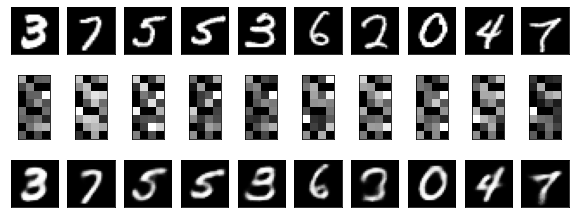

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = numero_imagens, figsize = (10, 4))
for imagens, ax_row in zip([imagens_teste, imagens_codificadas, 
                            imagens_decodificadas], axes):
    for img, ax in zip(imagens, ax_row):
        ax.imshow(img, cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)